In [1]:
import pandas as pd

data = {
    "Date": pd.date_range(start="2024-01-01", periods=20, freq='D'),
    "Close": [100, 102, 101, 105, 107, 110, 112, 115, 118, 120, 122, 121, 123, 126, 128, 127, 130, 133, 135, 137]
}

df = pd.DataFrame(data)
df.to_csv("stock_prices.csv", index=False)

print("Dataset saved as stock_prices.csv")

Dataset saved as stock_prices.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Load dataset
#df = pd.read_csv("stock_prices.csv", parse_dates=["Date"], index_col="Date")
# Load dataset and explicitly set frequency
df = pd.read_csv("stock_prices.csv", parse_dates=["Date"], index_col="Date")
df = df.asfreq('D')  # Set frequency to daily

In [21]:
# moving verage and exponential moving average
df["MA"] = df["Close"].rolling(window=5).mean()
df["EMA"] = df["Close"].ewm(span=5, adjust=False).mean()

In [23]:
# Train ARIMA model (Auto-Regressive Integrated Moving Average)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [25]:
# Fit ARIMA model
model = ARIMA(train["Close"], order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

In [33]:
def evaluate_performance(actual, predicted, method):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f"{method} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

In [37]:
# Evaluate performance
evaluate_performance(test["Close"], df.loc[test.index, "MA"].dropna(), "Moving Average")
evaluate_performance(test["Close"], df.loc[test.index, "EMA"].dropna(), "Exponential Moving Average")
evaluate_performance(test["Close"], forecast, "ARIMA")

Moving Average - MAE: 4.10, RMSE: 4.14
Exponential Moving Average - MAE: 3.94, RMSE: 3.95
ARIMA - MAE: 2.40, RMSE: 2.53


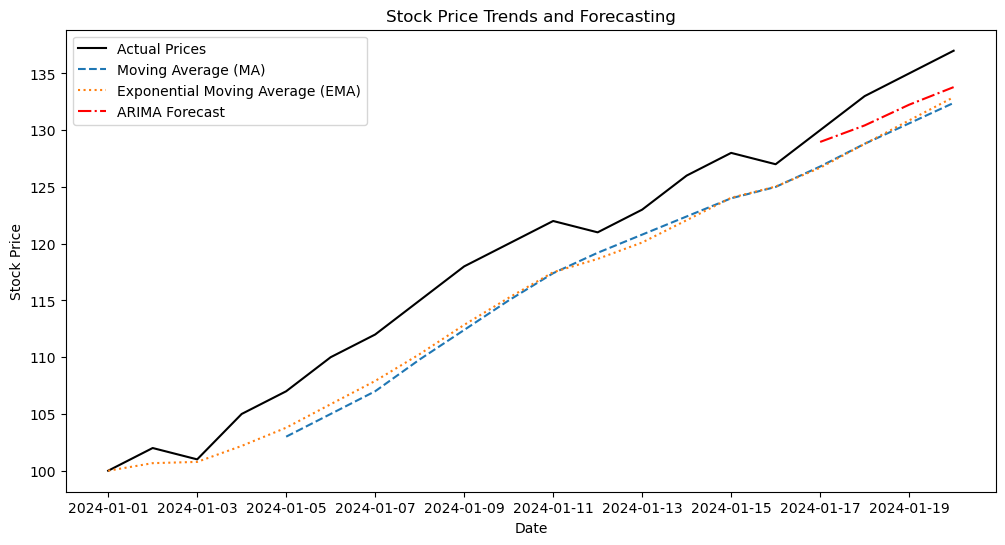

In [39]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual Prices", color="black")
plt.plot(df.index, df["MA"], label="Moving Average (MA)", linestyle="dashed")
plt.plot(df.index, df["EMA"], label="Exponential Moving Average (EMA)", linestyle="dotted")
plt.plot(test.index, forecast, label="ARIMA Forecast", linestyle="dashdot", color="red")
plt.legend()
plt.title("Stock Price Trends and Forecasting")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()